In [1]:
# %%capture
# #Install tumor-tcell from one directory up
# !pip install ../

In [8]:
from bigraph_viz import plot_bigraph, plot_multitimestep, convert_vivarium_composite
from bigraph_viz.dict_utils import replace_regex_recursive
from tumor_tcell.experiments.main import large_experiment
from vivarium.core.engine import pf
from vivarium.core.composer import Composite

In [11]:
plot_settings = {'remove_process_place_edges': True}
save_images = False
if save_images:
    plot_settings.update({'out_dir': 'out','dpi': '250'})
    
plot_settings2={}
if save_images:
    plot_settings2.update({
        'out_dir': 'out',
        'dpi': '250'
    })

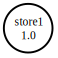

In [4]:
simple_store_state = {
    'store1': 1.0,
}
plot_bigraph(simple_store_state, **plot_settings, show_values=True, filename='simple_store')

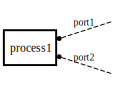

In [5]:
process_spec = {
    '_type': 'python_process',
    'process1': {
        '_type': 'edge',
        '_ports': {
            'port1': 'Any',
            'port2': 'Any',
        },
    },
}
plot_bigraph(process_spec, **plot_settings, rankdir='RL', filename='process')

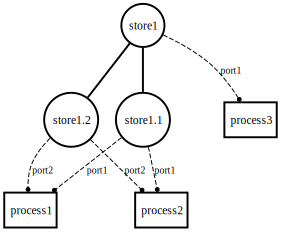

In [6]:
nested_composite_spec = {
    'store1': {
        'store1.1': 'float',
        'store1.2': 'int',
        'process1': {
            '_type': 'python_process:temporal',
            'wires': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
        'process2': {
            '_type': 'python_process:temporal',
            'wires': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
    },
    'process3': {
        '_type': 'python_process:temporal',
        'wires': {
            'port1': 'store1',
        }
    }
}
# validate_schema(nested_composite_spec)  # validate it follows the schema types
plot_bigraph(nested_composite_spec, **plot_settings, filename='nested_composite')

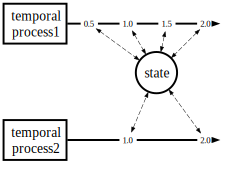

In [12]:
multitimestep_spec = {
    'temporal process2': {
        '_ports': {'port1': 'Any'},
        'wires': {'port1': 'state'},
        '_sync_step': 1.0,
    },
    'temporal process1': {
        '_ports': {'port1': 'Any'},
        'wires': {'port1': 'state'},
        '_sync_step': 0.5,
    },
}
multitimestep_spec = replace_regex_recursive(multitimestep_spec)
plot_multitimestep(multitimestep_spec, total_time=2.0, **plot_settings2, filename='multitimestep')

In [13]:
data, experiment = large_experiment(
        n_tcells=1,
        n_tumors=0,
        n_dendritic=0,
        n_tcells_lymph_node=0,
        tumors_state_PDL1n=0.5,
        tcells_total_PD1n=8,
        dendritic_state_active=0.5,
        lymph_nodes=True,
        total_time=0, 
        field_molecules=['IFNg', 'tumor_debris'],
        return_experiment=True,
    )

Initializing experiment tumor_tcell_20231017.090502


0it [00:00, ?it/s]

Completed in 0.01 seconds


In [21]:
composite = Composite(
    state=experiment.state.get_value(), 
    processes=experiment.state.get_processes(), 
    topology=experiment.state.get_topology(), 
    flow=experiment.state.get_flow(),
)
del composite['_schema']
del composite['state']

In [17]:
# print(pf(composite))

In [23]:
bigraph_spec = convert_vivarium_composite(composite)

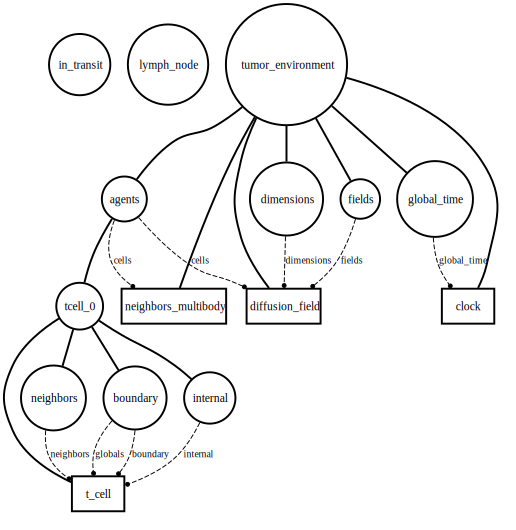

In [24]:
plot_bigraph(bigraph_spec,
             # dpi='500',
             # out_dir='out',
             # filename='tumor_tcell_bigraph',
            )